## **Web Scraping and Sentiment Analysis for customer reviews**

In [ ]:
Assignment Sections:

1. Scraping review data from Amazon
2. Importing, Preprocessing and Training on given training data
3. Sentimental analysis on Scraped data
4. Data Visualization

Data dictionary (after mounting drive to colab notebook location of files to be place inside drive):
-Colab Data
   -AmazonReviews
     -(Training Data files)

In [ ]:
#stored given training data on my drive and then mounted the drive in colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Scraping review data from Amazon


---


In [ ]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import concurrent.futures
import time
import threading

In [ ]:
header={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'}

In [ ]:
#search mobiles on amazon search page and return the page response
def searchMobiles(search_query,page_no):
    url="https://www.amazon.in/s?k="+search_query+"&page="+page_no
    print(url)
    page=requests.get(url,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [ ]:
#append each mobile's asin from response to the list of mobile data
asins=[] 
pages=7 #no of pages of mobiles search response (each page has around 16 phones, here i took 16*7=112 phones)
for m in range(pages):
  response=searchMobiles('mobiles',str(m))
  soup=BeautifulSoup(response.content)
  soup.prettify()
  for i in soup.findAll("div",{'class':"sg-col-20-of-24 s-result-item s-asin sg-col-0-of-12 sg-col-28-of-32 sg-col-16-of-20 sg-col sg-col-32-of-36 sg-col-12-of-16 sg-col-24-of-28"}):
      asins.append(i['data-asin']) #unique asin id of each phone

https://www.amazon.in/s?k=mobiles&page=0
https://www.amazon.in/s?k=mobiles&page=1
https://www.amazon.in/s?k=mobiles&page=2
https://www.amazon.in/s?k=mobiles&page=3
https://www.amazon.in/s?k=mobiles&page=4
https://www.amazon.in/s?k=mobiles&page=5
https://www.amazon.in/s?k=mobiles&page=6


In [ ]:
#check if site of each mobile is active and returns 200
def fetchAsin(asin):
    url="https://www.amazon.in/dp/"+asin
    print(url)
    page=requests.get(url,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

In [ ]:
#append links and mobile phone titles to respective list
link=[]
title=[]
def appendData(i):
   response=fetchAsin(asins[i])
   if(response!="Error"):
      soup=BeautifulSoup(response.content)
      for i in soup.findAll("a",{'data-hook':"see-all-reviews-link-foot"}):
          link.append(i['href'])
          title.append(soup.title.string)
   else:
      print("Error downloading data")

In [ ]:
asin_range= range(len(asins))
t0 = time.time()
with concurrent.futures.ThreadPoolExecutor(max_workers=100) as executor: #calling function using multithreading
    threads = {executor.submit(appendData, i): i for i in asin_range}
t1 = time.time()
print(f"{t1-t0} seconds to fetch URLs of "+str(len(asins))+" mobiles")

https://www.amazon.in/dp/B07DJCJBB3
https://www.amazon.in/dp/B07HGJJ559https://www.amazon.in/dp/B07HGGYWL6

https://www.amazon.in/dp/B07X4R63DF
https://www.amazon.in/dp/B07HGH88GLhttps://www.amazon.in/dp/B086KCCMCP

https://www.amazon.in/dp/B07SDPJ4XJ
https://www.amazon.in/dp/B077PWBC78https://www.amazon.in/dp/B07HGH8D2R

https://www.amazon.in/dp/B089MQ622N
https://www.amazon.in/dp/B07WPVLKPW
https://www.amazon.in/dp/B07X1KSLC3https://www.amazon.in/dp/B086977TR6

https://www.amazon.in/dp/B086KCDGTQhttps://www.amazon.in/dp/B07KXCKPZZ

https://www.amazon.in/dp/B089MV96RW
https://www.amazon.in/dp/B07DJCJBB3
https://www.amazon.in/dp/B07HGJJ559
https://www.amazon.in/dp/B07HGGYWL6
https://www.amazon.in/dp/B07X4R63DF
https://www.amazon.in/dp/B086KCCMCPhttps://www.amazon.in/dp/B07SDPJ4XJ
https://www.amazon.in/dp/B077PWBC78

https://www.amazon.in/dp/B07HGN617Mhttps://www.amazon.in/dp/B07HGH8D2R

https://www.amazon.in/dp/B089MQ622N
https://www.amazon.in/dp/B07WPVLKPW
https://www.amazon.in/dp/B08

In [ ]:
#fetch reviews and append to reviews list along with respective title to titles list
def Searchreviews(review_link,k):
    url="https://www.amazon.in"+review_link
    #print(url)
    page=requests.get(url,headers=header)
    if page.status_code==200:
        #print(page.content)
        soup=BeautifulSoup(page.content)
        for i in soup.findAll("span",{'data-hook':"review-body"}):
              reviews.append(i.text)
              titles.append(title[j])
              print("Phone "+str(j+1)+": "+title[j]+"\t Page : "+k)
    else:
        return "Error"
    time.sleep(0.25)

In [ ]:
#do either this or the next one , i have done 2 ways of implementing multithreading
#fetching multiple review pages upto 100 of each mobile using multithreading. #method 1  
titles=[]
reviews=[]
trange=range(10) #no of review pages of each mobile

t0 = time.time()
for j in range(len(link)):
  threads = [threading.Thread(target=Searchreviews, args=(link[j]+'&pageNumber='+str(k),str(k),)) for k in trange]
  for thread in threads:
      thread.start()
  for thread in threads:
      thread.join()

t1 = time.time()

Streaming output truncated to the last 5000 lines.
Phone 62: OPPO A5 2020 (Mirror Black, 4GB RAM, 64GB Storage) with No Cost EMI/Additional Exchange Offers: Amazon.in: Electronics	 Page : 0
Phone 62: OPPO A5 2020 (Mirror Black, 4GB RAM, 64GB Storage) with No Cost EMI/Additional Exchange Offers: Amazon.in: Electronics	 Page : 0
Phone 62: OPPO A5 2020 (Mirror Black, 4GB RAM, 64GB Storage) with No Cost EMI/Additional Exchange Offers: Amazon.in: Electronics	 Page : 0
Phone 62: OPPO A5 2020 (Mirror Black, 4GB RAM, 64GB Storage) with No Cost EMI/Additional Exchange Offers: Amazon.in: Electronics	 Page : 0
Phone 62: OPPO A5 2020 (Mirror Black, 4GB RAM, 64GB Storage) with No Cost EMI/Additional Exchange Offers: Amazon.in: Electronics	 Page : 0
Phone 62: OPPO A5 2020 (Mirror Black, 4GB RAM, 64GB Storage) with No Cost EMI/Additional Exchange Offers: Amazon.in: Electronics	 Page : 0
Phone 62: OPPO A5 2020 (Mirror Black, 4GB RAM, 64GB Storage) with No Cost EMI/Additional Exchange Offers: Amazon.in

In [ ]:
#fetching multiple review pages upto 100 of each mobile using multithreading. #method 2 (preferred)
titles=[]
reviews=[]
trange=range(10) #no of review pages of each mobile

t0 = time.time()
for j in range(len(link)):
  print(j)
  with concurrent.futures.ThreadPoolExecutor(max_workers=100) as executor:
    future_to_url = {executor.submit(Searchreviews, link[j]+'&pageNumber='+str(k),str(k)): k for k in trange}
t1 = time.time()

Streaming output truncated to the last 5000 lines.
Phone 66: Tecno Spark 6 Air (Ocean Blue, 2GB RAM, 32GB Storage): Amazon.in: Electronics	 Page : 6
Phone 66: Tecno Spark 6 Air (Ocean Blue, 2GB RAM, 32GB Storage): Amazon.in: Electronics	 Page : 6
Phone 66: Tecno Spark 6 Air (Ocean Blue, 2GB RAM, 32GB Storage): Amazon.in: Electronics	 Page : 1
Phone 66: Tecno Spark 6 Air (Ocean Blue, 2GB RAM, 32GB Storage): Amazon.in: Electronics	 Page : 1
Phone 66: Tecno Spark 6 Air (Ocean Blue, 2GB RAM, 32GB Storage): Amazon.in: Electronics	 Page : 1
Phone 66: Tecno Spark 6 Air (Ocean Blue, 2GB RAM, 32GB Storage): Amazon.in: Electronics	 Page : 1
Phone 66: Tecno Spark 6 Air (Ocean Blue, 2GB RAM, 32GB Storage): Amazon.in: Electronics	 Page : 1
Phone 66: Tecno Spark 6 Air (Ocean Blue, 2GB RAM, 32GB Storage): Amazon.in: Electronics	 Page : 1
Phone 66: Tecno Spark 6 Air (Ocean Blue, 2GB RAM, 32GB Storage): Amazon.in: Electronics	 Page : 1
Phone 66: Tecno Spark 6 Air (Ocean Blue, 2GB RAM, 32GB Storage): Am

In [ ]:
print(f"{t1-t0} seconds to download reviews from "+str(trange[-1]+1)+" pages of "+str(len(link))+" mobiles each")

213.78605341911316 seconds to download reviews from 10 pages of 116 mobiles each


In [ ]:
review_data=pd.DataFrame.from_dict({"title":titles,'review':reviews}) #converting reviews and titles list into a dataframe
#review_data.to_csv('Scraping reviews.csv',index=False)
review_data

,title,review
0,"Samsung Galaxy M31 (Ocean Blue, 6GB RAM, 128GB...",\n\n This is best thing you can get at this p...
1,"Samsung Galaxy M31 (Ocean Blue, 6GB RAM, 128GB...","\n\n Best camera, very good battery life, eat..."
2,"Samsung Galaxy M31 (Ocean Blue, 6GB RAM, 128GB...",\n\n 3rd class front camera. 32 MP front came...
3,"Samsung Galaxy M31 (Ocean Blue, 6GB RAM, 128GB...",\n\n Lets just begin with the obvious. This p...
4,"Samsung Galaxy M31 (Ocean Blue, 6GB RAM, 128GB...","\n\n I am using it from 3 days , 6000 mah bat..."
...,...,...
11396,"Redmi 9A (Sea Blue, 2Gb Ram, 32Gb Storage): Am...",\n\n Working well Nice product\n\n
11397,"Redmi 9A (Sea Blue, 2Gb Ram, 32Gb Storage): Am...",\n\n Good\n\n
11398,"Redmi 9A (Sea Blue, 2Gb Ram, 32Gb Storage): Am...","\n\n This phone is labelled as ""Made in China..."
11399,"Redmi 9A (Sea Blue, 2Gb Ram, 32Gb Storage): Am...",\n\n Awesome\n\n



# Importing, Preprocessing and Training on given training data

---



In [ ]:
#importing and formatting data from both files and storing as dataframe, and then merging both data frame by id
import re
strRegex = re.compile('[a-zA-Z]+') #regex for non numeric string
dictionaryFile=open("/content/drive/My Drive/Colab Data/AmazonReviews/dictionary.txt","r") 
sentimentFile=open("/content/drive/My Drive/Colab Data/AmazonReviews/sentiment_labels.txt","r")
scores=[]
ids1=[]
phrases=[]
ids2=[]
phrases=[]
for line1 in dictionaryFile: #storing and formatting data from dictionary text file to dataframe
    id1=-1
    if(strRegex.match(line1.split("|")[-1].replace("\n",""))==None): #if id column contain a string replace it with -1
      id1=line1.split("|")[-1].replace("\n","")  
      
    phrase=line1.split("|")[0]
    phrases.append(phrase)
    ids1.append(int(id1))
    
for line2 in sentimentFile:  #storing and formatting data from sentiment_labels text file to dataframe
    if(strRegex.match(line2.split("|")[0].replace("\n",""))==None):  #if id column contain a string replace it with -1
      id2=line2.split("|")[0].replace("\n","")
    else:
      id2=-1
    score=line2.split("|")[-1].replace("\n","")
    ids2.append(int(id2))
    scores.append(score)

#storing into seperate data frames and then merging using outer join
dictionary1=pd.DataFrame.from_dict({'id':ids1,"phrase":phrases}) 
dictionary1.set_index('id')
dictionary1.sort_values(by=['id'])
dictionary2=pd.DataFrame.from_dict({'id':ids2,"sentimentScore":scores}) 
dictionary2.set_index('id')
dictionary2.sort_values(by=['id'])
dictionary_data = pd.merge(dictionary1, dictionary2, on='id', how='outer')
dictionary_data.reset_index(drop=True)
data_train=dictionary_data
data_train=data_train.dropna() 

,id,phrase,sentimentScore
0,0,!,0.5
1,22935,! ',0.52778
2,18235,! '',0.5
4,22936,! Brilliant,0.86111
5,40532,! Brilliant !,0.93056
...,...,...,...
33513,66380,"In the long , dishonorable history of quickie ...",0.40278
33514,106715,In the name of an allegedly inspiring and easi...,0.63889
33515,106716,In the name of an allegedly inspiring and easi...,0.25
33516,66381,In the new release of Cinema Paradiso,0.55556


In [ ]:
import numpy as np
data_train=data_train.dropna() #removing NaN data
data_train=data_train[data_train['phrase']!=''] #removing blank data
data_train=data_train[data_train['phrase']!=np.nan] #removing nan data
data_train

,id,phrase,sentimentScore
0,0,!,0.5
1,22935,! ',0.52778
2,18235,! '',0.5
4,22936,! Brilliant,0.86111
5,40532,! Brilliant !,0.93056
...,...,...,...
33513,66380,"In the long , dishonorable history of quickie ...",0.40278
33514,106715,In the name of an allegedly inspiring and easi...,0.63889
33515,106716,In the name of an allegedly inspiring and easi...,0.25
33516,66381,In the new release of Cinema Paradiso,0.55556


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("popular")
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB 

In [ ]:
#storing stop words
stop_words = stopwords.words('english')
lemmatizer=WordNetLemmatizer()

In [ ]:
def cleanText(text):
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', text) # remove URLs
    text = re.sub('@[^\s]+', 'AT_USER', text) # remove usernames
    text = re.sub(r'#([^\s]+)', r'\1', text) # remove the # in #hashtag
    text = re.sub(r'@[A-Za-z0-9]','',text) #remove @ tags 
    text = re.sub(r'[0-9]','',text) #remove numbers
    text = re.sub(r'[^\w\s]','',text)
    return text

In [ ]:
def preProcess(data,colname):
    lemmatizer=WordNetLemmatizer()
    for index,row in data.iterrows():
        filter_sentence = ''
        sentence = str(row[colname])
        sentence = cleanText(sentence) #cleaning
        words = nltk.word_tokenize(sentence) #tokenization
        words = [w for w in words if not w in stop_words]  #stopwords removal
        for word in words:
            filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower() # lemmatize and convert to lower-case
        data.loc[index,'phrase'] = filter_sentence
    return data

In [ ]:
data_train=preProcess(data_train,'phrase')
train = data_train[['phrase','sentimentScore']]

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words=stop_words)
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(train['phrase'])

In [ ]:
#split in samples
from sklearn.model_selection import train_test_split
X_train1, X_train2, y_train1, y_train2 = train_test_split(tfidf, train['sentimentScore'], random_state=0)

In [ ]:
from sklearn.svm import SVC
lin_clf = SVC(kernel='linear',decision_function_shape='ovr')
lin_clf.fit(X_train1, y_train1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred1 = lin_clf.predict(X_train1)
pred2 = lin_clf.predict(X_train2)

# Sentimental analysis on Scraped data

In [ ]:
import numpy as np

In [ ]:
data_test=preProcess(review_data,'review') #pre process scraped data and store as test data
test = data_test[['review']]

In [ ]:
tfidf_test = tfidf_vectorizer.fit_transform(test['review']) #Convert raw words to a matrix of TF-IDF features.
pred_test = lin_clf.predict(tfidf_test)

In [ ]:
review_data['Sentiment score']=pred_test
review_data['Sentiment class']=np.nan #creating a new column for sentiment class
review_data['Sentiment score']=review_data['Sentiment score'].astype(float) #converting sentiment score from string to float

In [ ]:
for i in range(len(review_data['Sentiment score'])):
    score=review_data['Sentiment score'][i]
    if(0.2< score <=0.4):
      review_data['Sentiment class'][i]='Negative'
    if(0.4< score <=0.6):
      review_data['Sentiment class'][i]='Neutral'
    if(0.6< score <=0.8):
      review_data['Sentiment class'][i]='Positive'
    if(0.8< score <=1.0):
      review_data['Sentiment class'][i]='Very Positive'
    if(0<= score <=0.2):
      review_data['Sentiment class'][i]='Very Negative'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

In [ ]:
review_data

,title,review,Sentiment score,Sentiment class,phrase
0,"Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...",\n\n Honest review for a Honest Samsung phone...,0.69444,Positive,honest review honest samsung phone i writing ...
1,"Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...","\n\n Ordered on Prime day, 6th August 12 AM. ...",0.77778,Positive,ordered prime day th august am received phone...
2,"Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...",\n\n This is to share my horrible experience...,0.69444,Positive,this share horrible experience amazon samsung...
3,"Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...",\n\n Strongly recommend No..why samsung make ...,0.66667,Positive,strongly recommend nowhy samsung make lot adv...
4,"Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...",\n\n Initial impression after using for one d...,0.73611,Positive,initial impression using one day the display ...
...,...,...,...,...,...
11732,"Vivo U10 (Thunder Black,5000 mAH 18W Fast Char...",\n\n YE Device Ko Major Problem hey .Maine Is...,0.50000,Neutral,ye device ko major problem hey maine isko rep...
11733,"Vivo U10 (Thunder Black,5000 mAH 18W Fast Char...",\n\n Excellent phone. Got it in a deal in in ...,0.72222,Positive,excellent phone got deal rs k product finish ...
11734,"Vivo U10 (Thunder Black,5000 mAH 18W Fast Char...",\n\n I'm experiencing lots of difficulty whil...,0.59722,Neutral,im experiencing lot difficulty handlingfinger...
11735,"Vivo U10 (Thunder Black,5000 mAH 18W Fast Char...",\n\n *Fingerprint scanner is fast😍*Battery ba...,0.77778,Positive,fingerprint scanner fastbattery backup goodca...


In [ ]:
review_data=review_data.drop(columns=['phrase'])
pd.DataFrame(review_data).to_csv("review_sentiments.csv",index=False)

# Data Visualization

---




Text(0, 0.5, 'Sentiment')

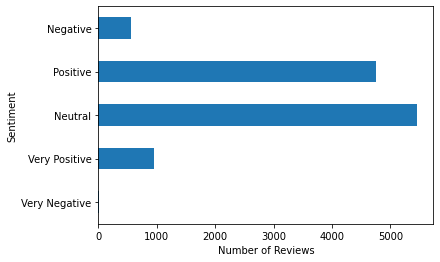

In [ ]:
#horizontal bar graph
import matplotlib.pyplot as plt
ax = review_data['Sentiment class'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Sentiment')

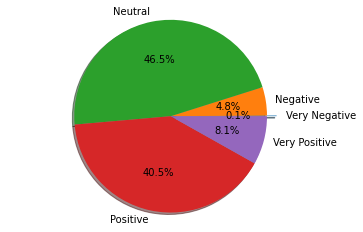

In [ ]:
# Pie chart
labels = ['Very Negative','Negative','Neutral','Positive','Very Positive']
sizes = [len(review_data['Sentiment class'][review_data['Sentiment class']=="Very Negative"])*100/len(review_data['Sentiment class']),
         len(review_data['Sentiment class'][review_data['Sentiment class']=="Negative"])*100/len(review_data['Sentiment class']),
         len(review_data['Sentiment class'][review_data['Sentiment class']=="Neutral"])*100/len(review_data['Sentiment class']),
         len(review_data['Sentiment class'][review_data['Sentiment class']=="Positive"])*100/len(review_data['Sentiment class']),
         len(review_data['Sentiment class'][review_data['Sentiment class']=="Very Positive"])*100/len(review_data['Sentiment class'])]
explode = (0.1, 0, 0, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode, labels=labels, shadow=True, autopct='%1.1f%%',)
ax1.axis('equal')  

plt.show()

In [ ]:
review_data[review_data['Sentiment class']=='Neutral']

,title,review,Sentiment score,Sentiment class
5,"Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...","\n\n purchased the phone on very first day, d...",0.50000,Neutral
7,"Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...","\n\n Don't buy anyone worst product, Waste of...",0.59722,Neutral
11,"Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...",\n\n Worst mobile ever phone is heating too m...,0.50000,Neutral
14,"Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...",\n\n Bad product... Don't buy ... Hold your m...,0.52778,Neutral
20,"Samsung Galaxy M31s (Mirage Blue, 6GB RAM, 128...",\n\n 1.display is superb2.getting two days of...,0.50000,Neutral
...,...,...,...,...
11722,"Vivo U10 (Thunder Black,5000 mAH 18W Fast Char...",\n\n Very gud I buyed my phone with my salary...,0.52778,Neutral
11726,"Vivo U10 (Thunder Black,5000 mAH 18W Fast Char...",\n\n I am a pubg lover and keep playing whene...,0.50000,Neutral
11731,"Vivo U10 (Thunder Black,5000 mAH 18W Fast Char...",\n\n I can say . . Value for money I got this...,0.50000,Neutral
11732,"Vivo U10 (Thunder Black,5000 mAH 18W Fast Char...",\n\n YE Device Ko Major Problem hey .Maine Is...,0.50000,Neutral
